In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

**Part 1 - Data Preprocessing**

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


**Part 2 - Building the CNN**

Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Part 3 - Training the CNN**

Compiling the CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

Training the CNN on the Training set and evaluating it on the Test set

In [13]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50


163/163 [==============================] - 105s 637ms/step - loss: 0.3541 - accuracy: 0.8418 - val_loss: 0.3250 - val_accuracy: 0.8574
Epoch 2/50
163/163 [==============================] - 49s 299ms/step - loss: 0.2049 - accuracy: 0.9174 - val_loss: 0.4577 - val_accuracy: 0.8061
Epoch 3/50
163/163 [==============================] - 49s 299ms/step - loss: 0.2060 - accuracy: 0.9185 - val_loss: 0.3991 - val_accuracy: 0.8510
Epoch 4/50
163/163 [==============================] - 48s 295ms/step - loss: 0.1747 - accuracy: 0.9291 - val_loss: 0.2647 - val_accuracy: 0.8990
Epoch 5/50
163/163 [==============================] - 49s 298ms/step - loss: 0.1587 - accuracy: 0.9379 - val_loss: 0.4439 - val_accuracy: 0.8381
Epoch 6/50
163/163 [==============================] - 49s 298ms/step - loss: 0.1575 - accuracy: 0.9413 - val_loss: 0.5300 - val_accuracy: 0.8109
Epoch 7/50
163/163 [==============================] - 48s 296ms/step - loss: 0.1634 - accuracy: 0.9346 - val_loss: 0.3412 - val

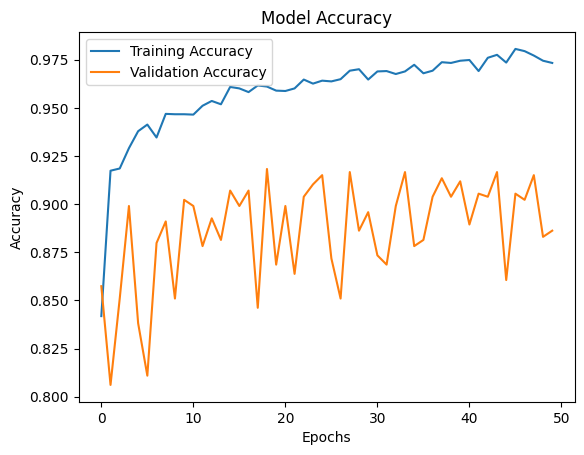

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
history.history['accuracy']

[0.8418328166007996,
 0.9173696041107178,
 0.918519914150238,
 0.9290643930435181,
 0.9378834366798401,
 0.9413343667984009,
 0.9346242547035217,
 0.9468941688537598,
 0.9467024803161621,
 0.9467024803161621,
 0.9465107321739197,
 0.9511119723320007,
 0.9536042809486389,
 0.9518788456916809,
 0.9608895778656006,
 0.9601227045059204,
 0.95820552110672,
 0.9616564512252808,
 0.9610812664031982,
 0.9589723944664001,
 0.9587806463241577,
 0.9601227045059204,
 0.9647239446640015,
 0.9626150131225586,
 0.964148759841919,
 0.9637653231620789,
 0.9649156332015991,
 0.9693251252174377,
 0.9700919985771179,
 0.9647239446640015,
 0.9689416885375977,
 0.9691334366798401,
 0.9675996899604797,
 0.9689416885375977,
 0.9723926186561584,
 0.9679831266403198,
 0.9693251252174377,
 0.9737346768379211,
 0.973351240158081,
 0.9745015501976013,
 0.9748849868774414,
 0.9691334366798401,
 0.9760352969169617,
 0.977569043636322,
 0.9735429286956787,
 0.980636477470398,
 0.9794861674308777,
 0.9771856069564819,

In [16]:
history.history['val_accuracy']

[0.8573718070983887,
 0.8060897588729858,
 0.8509615659713745,
 0.8990384340286255,
 0.8381410241127014,
 0.8108974099159241,
 0.879807710647583,
 0.8910256624221802,
 0.8509615659713745,
 0.9022436141967773,
 0.8990384340286255,
 0.8782051205635071,
 0.8926281929016113,
 0.8814102411270142,
 0.9070512652397156,
 0.8990384340286255,
 0.9070512652397156,
 0.8461538553237915,
 0.9182692170143127,
 0.8685897588729858,
 0.8990384340286255,
 0.8637820482254028,
 0.9038461446762085,
 0.9102563858032227,
 0.9150640964508057,
 0.8717948794364929,
 0.8509615659713745,
 0.9166666865348816,
 0.8862179517745972,
 0.8958333134651184,
 0.8733974099159241,
 0.8685897588729858,
 0.8990384340286255,
 0.9166666865348816,
 0.8782051205635071,
 0.8814102411270142,
 0.9038461446762085,
 0.9134615659713745,
 0.9038461446762085,
 0.9118589758872986,
 0.8894230723381042,
 0.9054487347602844,
 0.9038461446762085,
 0.9166666865348816,
 0.8605769276618958,
 0.9054487347602844,
 0.9022436141967773,
 0.91506409645

Finding class indeces

In [17]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Saving Model

In [18]:
from keras.models import load_model 
cnn.save("Pneumonia_Model.h5") 

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Part 4 - Making a single prediction**

In [19]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
cnn = load_model("Pneumonia_Model.h5")

In [20]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('chest_xray/test/PNEUMONIA/person17_virus_48.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Pneumonia'
else:
  prediction = 'Normal'
print(prediction)

1/1 [==============================] - 0s 162ms/step
Pneumonia
